In [139]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy,CategoricalAccuracy
from tensorflow.keras.optimizers import SGD


In [140]:
!pip install mnist
import mnist

In [141]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [142]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [143]:
train_images.shape

(60000, 28, 28)

In [144]:
# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [145]:
train_images.shape

(60000, 28, 28, 1)

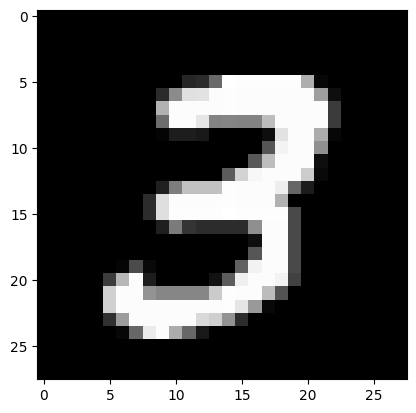

In [146]:
plt.imshow(train_images[7][:,:,0],cmap='gray')#,cmap='grayscale' google greyscale in matplot
plt.show()

In [147]:
train_labels[7]

3

In [148]:
learning_rate = 0.001
n_epochs = 20

initializer = RandomNormal(mean=0., stddev=1.)

In [173]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Add a convolutional layer
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(128, activation='relu', kernel_initializer=initializer),
  BatchNormalization(),
  Dropout(0.2),
  Dense(64, activation='relu', kernel_initializer=initializer),
  BatchNormalization(),
   Dropout(0.2),
  Dense(32, activation='relu', kernel_initializer=initializer),
  BatchNormalization(),
   Dropout(0.2),
  Dense(10, activation='softmax',kernel_initializer=initializer)
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_26 (Flatten)        (None, 5408)              0         
                                                                 
 dense_101 (Dense)           (None, 128)               692352    
                                                                 
 batch_normalization_32 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_48 (Dropout)        (None, 128)             

In [174]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss= CategoricalCrossentropy(),#
    metrics=[CategoricalAccuracy()],
)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=n_epochs,
    validation_data=(test_images, to_categorical(test_labels)),
    callbacks=[early_stopping]
)

Epoch 1/20
1875/1875 [==============================] - 47s 24ms/step - loss: 1.7824 - categorical_accuracy: 0.6329 - val_loss: 0.3055 - val_categorical_accuracy: 0.9087
Epoch 2/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.5255 - categorical_accuracy: 0.8414 - val_loss: 0.1981 - val_categorical_accuracy: 0.9416
Epoch 3/20
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3471 - categorical_accuracy: 0.8965 - val_loss: 0.1359 - val_categorical_accuracy: 0.9600
Epoch 4/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2481 - categorical_accuracy: 0.9261 - val_loss: 0.1038 - val_categorical_accuracy: 0.9666
Epoch 5/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1992 - categorical_accuracy: 0.9413 - val_loss: 0.0854 - val_categorical_accuracy: 0.9736
Epoch 6/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1655 - categorical_accuracy: 0.9504 - val_loss: 0.0816 - val_categoric

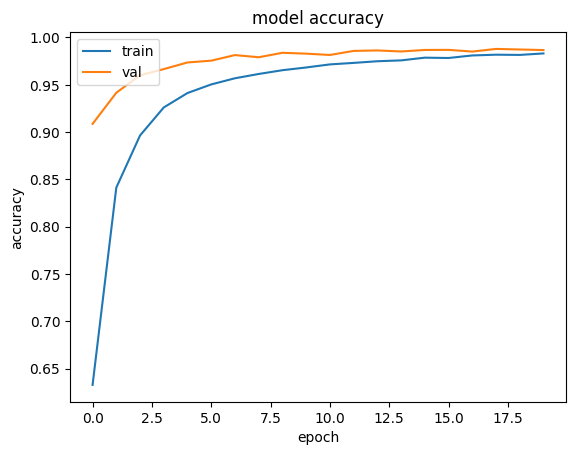

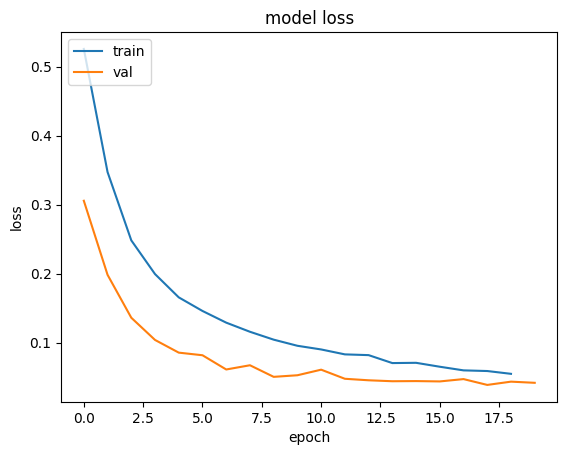

In [175]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [176]:
predictions = model.predict(test_images[:5])
print(predictions.shape)
print(predictions)


# Print our model's predictions.
print("Predictions")
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

print("Data")
# Check our predictions
print(test_labels[:5]) # [7, 2, 1, 0, 4]


1/1 [==============================] - 0s 139ms/step
(5, 10)
[[8.1138325e-07 1.3732221e-06 2.1751111e-06 1.0620391e-07 6.1110018e-07
  2.2351619e-08 1.6614688e-08 9.9999273e-01 1.2256740e-07 2.0766779e-06]
 [1.0951991e-06 9.6235249e-07 9.9999678e-01 4.8900195e-09 2.6927512e-07
  1.1070778e-10 1.0004554e-06 2.4423947e-08 1.8259298e-08 6.4294516e-09]
 [1.9751182e-07 9.9998116e-01 2.1478712e-07 9.8389199e-09 1.3964130e-05
  1.2185271e-07 3.3525049e-07 1.1599330e-06 2.7054571e-06 1.5266404e-07]
 [9.9999619e-01 1.7032614e-08 2.7591679e-07 3.7768361e-10 1.7403612e-07
  1.0475711e-08 3.2834012e-06 7.7270649e-08 3.9670338e-09 2.1874229e-08]
 [1.0734441e-07 5.9104104e-07 1.9211750e-07 3.6931333e-08 9.9996638e-01
  1.3674091e-07 4.6947861e-07 1.0122365e-07 7.2111123e-07 3.1282878e-05]]
Predictions
[7 2 1 0 4]
Data
[7 2 1 0 4]
